# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you pulled lyrics data on two artists. In this assignment we explore this data set and a pull from the now-defunct Twitter API for the artists Cher and Robyn.  If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Canvas. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [1]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

sw = stopwords.words("english")

In [22]:
# Add any additional import statements you need here




In [2]:
# change `data_location` to the location of the folder on your machine.
data_location = "/Users/sophie/ads509-tm-token-norm/M1 Results/"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

In [3]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :

    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """

    # Calculate the number of tokens
    num_tokens = len(tokens)
    # Calculate the number of unique tokens
    num_unique_tokens = len(set(tokens))
    # Calculate the lexical diversity
    lexical_diversity = num_unique_tokens / num_tokens
    # Calculate the number of characters
    num_characters = sum(len(t) for t in tokens)

    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        print("The five most common tokens:")
        token_counts = Counter(tokens) # 5 is the default
        for token, count in token_counts.most_common(5):
            print(f"{token}: {count}")
        print("\n")
    
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])
    

In [4]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)


There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.
The five most common tokens:
text: 3
here: 2
example: 2
is: 1
some: 1




Q: Why is it beneficial to use assertion statements in your code? 

A: It is beneficial to use assertion statements in your code because it helps you detect errors and invalid assumptions in your code, ultimately helping you fix errors and ensure your code is doing what you intend for it to do.

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [5]:
# Read in the lyrics data 

lyrics_data = defaultdict(dict)

for item in os.listdir(data_location + lyrics_folder):
    if os.path.isdir(data_location + lyrics_folder + item):
        for lyrics_page in os.listdir(data_location + lyrics_folder + item):
            artist = lyrics_page.split("_")[0]
            # Get the song name from the first line of the txt file
            with open(data_location + lyrics_folder + item + "/" + lyrics_page) as file:
                song = file.readline().strip()  # Read the first line and remove any extra spaces/newlines
                lyrics = file.read()  # Read the rest of the file for the lyrics
            lyrics_data[item][song] = lyrics

# Create a DataFrame with the lyrics data
lyrics_df = pd.DataFrame.from_dict(lyrics_data, orient='index').T
lyrics_df.index.name = 'song'
lyrics_df.columns.name = 'artist'
# Transpose the DataFrame
lyrics_df = lyrics_df.stack().reset_index()
lyrics_df.columns = ['song', 'artist', 'lyrics']

lyrics_df


,song,artist,lyrics
0,"""Include Me Out""",robyn,\n\n\nIt is really very simple\nJust a single ...
1,"""Electric""",robyn,\n\n\nElectric...\n\nIt's electric\nIt's a nat...
2,"""Beach 2K20""",robyn,\n\n\n(So you wanna go out?\nHow you gonna get...
3,"""Love Kills""",robyn,\n\n\nIf you're looking for love\nGet a heart ...
4,"""Time Machine""",robyn,"\n\n\nHey, what did I do?\nCan't believe the f..."
...,...,...,...
401,"""Take It From The Boys""",cher,\n\n\nSo scared I never been\nToo hard to keep...
402,"""Dream Baby""",cher,\n\n\nI found the boy for me\nHe's my dream ba...
403,"""Please Don't Tell Me""",cher,\n\n\nYa shook the override \nWhy'd I get this...
404,"""I Hope You Find It""",cher,"\n\n\nThese clouds aren't going nowhere, darli..."


In [6]:
# Read in the twitter data

twitter = os.listdir(data_location + twitter_folder)
description_field = [f for f in twitter if "followers_data" in f] #description field is in this .txt file

twitter_data = defaultdict(list)

for f in description_field:
    # Get the artist name from the filename
    # The artist name is the first part of the filename, before the underscore
    artist = f.split("_")[0]
    artist_map = {"robynkonichiwa": "robyn", "cher_official": "cher"} # map the artist names to the correct format
    artist = artist_map.get(artist, artist)

    with open(data_location + twitter_folder + f, 'r', encoding='utf8') as infile:
        next(infile) # open each file skip the header
        for idx, line in enumerate(infile.readlines()):

            line = line.strip().split("\t") # reads lines splitting using tab 
            if len(line) == 7: #appends the 7th column (description field)
                twitter_data[artist].append(line[6])

# Create a DataFrame with the twitter data
twitter_df = pd.DataFrame.from_dict(twitter_data, orient='index').T
twitter_df.index.name = "tweet"
twitter_df.columns.name = "artist"
# Transpose the DataFrame
twitter_df = twitter_df.stack().reset_index()
twitter_df.columns = ['tweet', 'artist', 'text']

twitter_df.head()

,tweet,artist,text
0,0,cher,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜
1,0,robyn,"""I love chill"" •Facebook / Instagram / SoundCl..."
2,1,cher,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡
3,1,robyn,"books, movies, music, nature & TV shows. OG Sw..."
4,2,cher,csu


## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [7]:
punctuation = set(punctuation) # speeds up comparison

In [8]:
# create your clean twitter data here
# split on whitespace, fold to lowercase, and remove stopwords

def clean_data(text):
    """
        Given a string of text, return a list of tokens that have been cleaned. 
        The cleaning process should include:
            - removing punctuation
            - folding to lowercase
            - removing stopwords
    """
    # remove punctuation
    text = ''.join([c for c in text if c not in punctuation])

    # fold to lowercase
    text = text.lower()

    # split on whitespace
    tokens = text.split()

    # remove stopwords
    tokens = [t for t in tokens if t not in sw]

    return tokens
# Apply the clean_twitter_data function to the text column
twitter_df['tokens'] = twitter_df['text'].apply(clean_data)

In [9]:
twitter_df['tokens'].head(10) 

0        [𝙿𝚛𝚘𝚞𝚍, 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛, 𝚘𝚏, 𝚖𝚎𝚜𝚜𝚢, 𝚋𝚞𝚗𝚜, 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜]
1    [love, chill, •facebook, instagram, soundcloud...
2        [163㎝／愛かっぷ💜26歳🍒, 工〇好きな女の子💓, フォローしてくれたらdmします🧡]
3    [books, movies, music, nature, tv, shows, og, ...
4                                                [csu]
5    [amauteur, en, herbe, 🌱, juriste, en, paille, ...
6    [writer, washinformer, spelmancollege, alumna,...
7    [twitter, profile, full, sarcasm, rants, occas...
8              [i’m, unemployed, live, parents, moops]
9    [flora, youssef, blogger, founder, posting, re...
Name: tokens, dtype: object

In [10]:
# create your clean lyrics data here
# Apply the clean_data function to the lyrics column
lyrics_df['tokens'] = lyrics_df['lyrics'].apply(clean_data)
lyrics_df['tokens'].head()

0    [really, simple, single, pulse, repeated, regu...
1    [electric, electric, natural, high, electric, ...
2    [wanna, go, gonna, get, ok, call, someone, alr...
3    [youre, looking, love, get, heart, made, steel...
4    [hey, cant, believe, fit, threw, stupid, wante...
Name: tokens, dtype: object

## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

In [11]:
# calls to descriptive_stats here
# Flatten all tokens into one list
twitter_tokens = [token for tokens in twitter_df['tokens'] for token in tokens]
lyrics_tokens = [token for tokens in lyrics_df['tokens'] for token in tokens]

# Call descriptive_stats on the flattened list
print(f"Twitter Stats: {descriptive_stats(twitter_tokens)}\n")
print(f"Lyrics Stats: {descriptive_stats(lyrics_tokens)}\n")

# Artist cher stats
cher_lyrics_df = lyrics_df[lyrics_df['artist'] == 'cher']
cher_tokens = [token for tokens in cher_lyrics_df['tokens'] for token in tokens]
print(f"Cher Lyrics Stats: {descriptive_stats(cher_tokens)}\n")

# Artist robyn stats
robyn_lyrics_df = lyrics_df[lyrics_df['artist'] == 'robyn']
robyn_tokens = [token for tokens in robyn_lyrics_df['tokens'] for token in tokens]
print(f"Robyn Lyrics Stats: {descriptive_stats(robyn_tokens)}\n")


There are 17166030 tokens in the data.
There are 1633934 unique tokens in the data.
There are 102079535 characters in the data.
The lexical diversity is 0.095 in the data.
The five most common tokens:
love: 226253
im: 148149
life: 130363
music: 103324
de: 79357


Twitter Stats: [17166030, 1633934, 0.0951841514898902, 102079535]

There are 47941 tokens in the data.
There are 4628 unique tokens in the data.
There are 230333 characters in the data.
The lexical diversity is 0.097 in the data.
The five most common tokens:
love: 1161
im: 764
know: 712
dont: 680
baby: 526


Lyrics Stats: [47941, 4628, 0.09653532466990676, 230333]

There are 34922 tokens in the data.
There are 3682 unique tokens in the data.
There are 167670 characters in the data.
The lexical diversity is 0.105 in the data.
The five most common tokens:
love: 923
im: 509
know: 475
dont: 428
youre: 332


Cher Lyrics Stats: [34922, 3682, 0.10543496936028865, 167670]

There are 13019 tokens in the data.
There are 2139 unique toke

Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: Since stopwords are so common in English language, if the stop words were left the top 5 words would likely be stopwords instead of pulling more meaningful words out of the text. 

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: Based on the top 5 words from each artist, there is not much of a difference between the top 5 words. Robyn and Cher are both pop artists that sing similar music and focus on similar themes so their most common words are similar.



## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [12]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [13]:
# find ten most common emojis by artist in the twitter data
def find_emoji_counts(twitter_df):
    """
        Given a DataFrame of twitter data, return a dictionary of emoji counts by artist.
    """
    # Create a dictionary to hold the emoji counts
    emoji_counts = defaultdict(Counter)

    # Iterate through the DataFrame
    for index, row in twitter_df.iterrows():
        # Get the artist name
        artist = row['artist']
        # Get the text
        text = row['text']
        # Find all emojis in the text
        emojis = [c for c in text if emoji.is_emoji(c)]
        # Update the counter for the artist
        emoji_counts[artist].update(emojis)

    return emoji_counts

# Call the function
emoji_counts = find_emoji_counts(twitter_df)

# Print the ten most common emojis for each artist
for artist, counts in emoji_counts.items():
    print(f"Most common emojis for {artist}:")
    for emoji, count in counts.most_common(10):
        print(f"{emoji}: {count}")
    print("\n")


Most common emojis for cher:
❤: 79223
🌈: 47549
♥: 33978
🏳: 33412
✨: 29468
💙: 21379
🏻: 20930
🌊: 20223
✌: 16773
💜: 16550


Most common emojis for robyn:
❤: 4783
🌈: 4685
🏳: 3528
♥: 3103
✨: 2223
🏻: 1495
✌: 1189
🏼: 1139
♀: 836
💙: 809




### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [14]:
# find ten most common hashtags by artist in the twitter data 
def find_hashtag_counts(twitter_df):
    """
        Given a DataFrame of twitter data, return a dictionary of hashtag counts by artist.
    """
    # Create a dictionary to hold the hashtag counts
    hashtag_counts = defaultdict(Counter)

    # Iterate through the DataFrame
    for index, row in twitter_df.iterrows():
        # Get the artist name
        artist = row['artist']
        # Get the text
        text = row['text']
        # Make lowercase
        text = text.lower()
        # Find all hashtags in the text
        hashtags = [c for c in text.split() if c.startswith("#")]
        # Update the counter for the artist
        hashtag_counts[artist].update(hashtags)

    return hashtag_counts
# Call the function
hashtag_counts = find_hashtag_counts(twitter_df)

# Print the ten most common hashtags for each artist
for artist, counts in hashtag_counts.items():
    print(f"Most common hashtags for {artist}:")
    for hashtag, count in counts.most_common(10):
        print(f"{hashtag}: {count}")
    print("\n")

Most common hashtags for cher:
#resist: 9558
#blm: 8753
#blacklivesmatter: 7432
#fbr: 2922
#theresistance: 2883
#resistance: 2405
#1: 2226
#: 1965
#voteblue: 1897
#lgbtq: 1457


Most common hashtags for robyn:
#blacklivesmatter: 563
#blm: 324
#music: 260
#1: 187
#: 150
#teamfollowback: 117
#edm: 104
#resist: 76
#freebritney: 63
#lgbtq: 58




### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [15]:
# Your code here
# 5 most common words in song title by artist
def find_most_common_words(lyrics_df):
    """
        Given a DataFrame of lyrics data, return a dictionary of most common words by artist.
    """
    # Create a dictionary to hold the word counts
    word_counts = defaultdict(Counter)

    # Iterate through the DataFrame
    for index, row in lyrics_df.iterrows():
        # Get the artist name
        artist = row['artist']
        # Get the song title and remove stopwords 
        words = [word.lower() for word in row['song'].split() if word.lower() not in sw]
        # Update the counter for the artist
        word_counts[artist].update(words)

    return word_counts

# Call the function
word_counts = find_most_common_words(lyrics_df)
# Print the five most common words for each artist
for artist, counts in word_counts.items():
    print(f"Most common words in song titles for {artist}:")
    for word, count in counts.most_common(5):
        print(f"{word}: {count}")
    print("\n")

Most common words in song titles for robyn:
"don't: 3
me": 3
girl": 3
thing": 3
"do: 3


Most common words in song titles for cher:
"the: 24
"i: 21
love: 16
you": 16
me": 13




### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


artist
Artist 1    Axes(0.125,0.11;0.775x0.77)
Artist 2    Axes(0.125,0.11;0.775x0.77)
Name: length, dtype: object

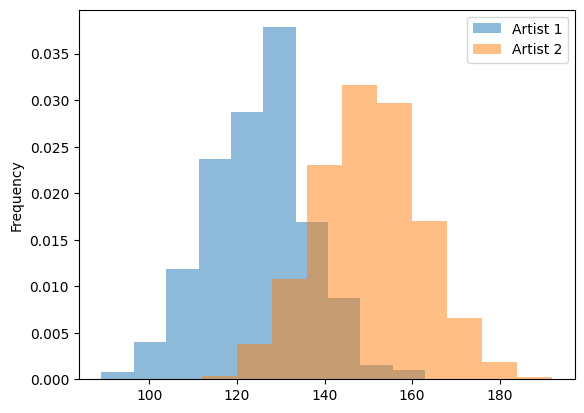

In [27]:
num_replicates = 1000

df = pd.DataFrame({
    "artist" : ['Artist 1'] * num_replicates + ['Artist 2']*num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: The regular expression '\s+' matches on any whitespace character. This includes tabs, spaces, newline characters. The + sign indicates that it could be one or more occurence of the preceding whitespace character.


In [16]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

artist
cher     Axes(0.125,0.11;0.775x0.77)
robyn    Axes(0.125,0.11;0.775x0.77)
Name: length, dtype: object

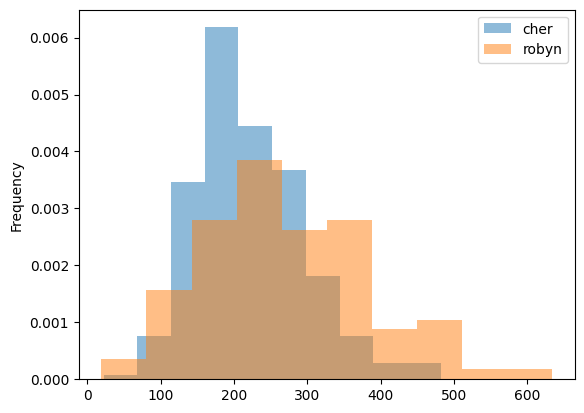

In [17]:
# Your lyric length comparison chart here. 
# Create a new column for the length of song lyrics
lyrics_df['length'] = lyrics_df['lyrics'].apply(lambda x: len(tokenize_lyrics(x)))

# Lyric length comparison by artist histogram
lyrics_df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)